Predictions for AND Gate:
[0 0 0 0]
Predictions for OR Gate:
[0 1 1 1]
Predictions for NOT Gate:
[0 0]


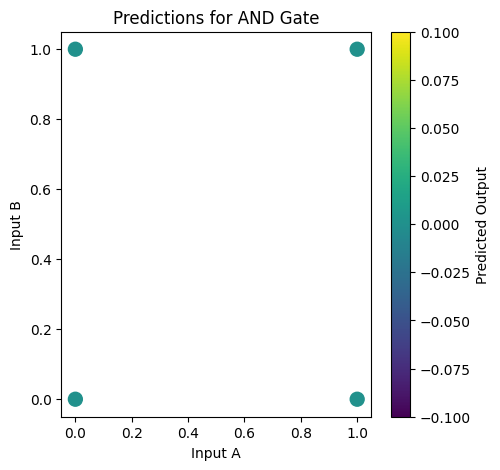

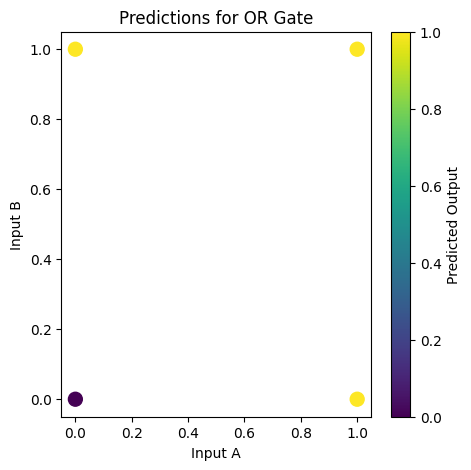

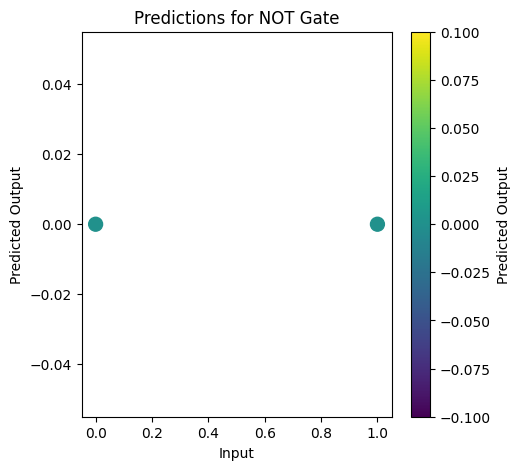

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class HebbNet:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size)  # Initialize weights to zero
        self.learning_rate = learning_rate  # Learning rate

    def train(self, X, y):
        """
        Train the network using the Hebbian learning rule.
        X: Input data
        y: Target output
        """
        for i in range(len(X)):
            # Update weights for each input/output pair
            self.weights += self.learning_rate * X[i] * (2 * y[i] - 1)  # Scale y to be -1 or 1

    def predict(self, X):
        """
        Predict the output based on the learned weights.
        X: Input data
        """
        return np.where(np.dot(X, self.weights) > 0, 1, 0)  # Activation function (threshold at 0)

# Define inputs and outputs for AND gate
# Input format: [A, B] | Output format: [A AND B]
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # Expected output for AND gate

# Define inputs and outputs for OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])  # Expected output for OR gate

# Define inputs and outputs for NOT gate (Single input)
X_not = np.array([[0], [1]])
y_not = np.array([1, 0])  # Expected output for NOT gate

# Train and test the Hebbian network for the AND gate
and_net = HebbNet(input_size=2, learning_rate=0.1)
and_net.train(X_and, y_and)
predictions_and = and_net.predict(X_and)
print("Predictions for AND Gate:")
print(predictions_and)

# Train and test the Hebbian network for the OR gate
or_net = HebbNet(input_size=2, learning_rate=0.1)
or_net.train(X_or, y_or)
predictions_or = or_net.predict(X_or)
print("Predictions for OR Gate:")
print(predictions_or)

# Train and test the Hebbian network for the NOT gate
not_net = HebbNet(input_size=1, learning_rate=0.1)
not_net.train(X_not, y_not)
predictions_not = not_net.predict(X_not)
print("Predictions for NOT Gate:")
print(predictions_not)

# Plot predictions for AND Gate
plt.figure(figsize=(5, 5))
plt.scatter(X_and[:, 0], X_and[:, 1], c=predictions_and, cmap='viridis', s=100)
plt.title('Predictions for AND Gate')
plt.xlabel('Input A')
plt.ylabel('Input B')
plt.colorbar(label='Predicted Output')
plt.show()

# Plot predictions for OR Gate
plt.figure(figsize=(5, 5))
plt.scatter(X_or[:, 0], X_or[:, 1], c=predictions_or, cmap='viridis', s=100)
plt.title('Predictions for OR Gate')
plt.xlabel('Input A')
plt.ylabel('Input B')
plt.colorbar(label='Predicted Output')
plt.show()

# Plot predictions for NOT Gate
plt.figure(figsize=(5, 5))
plt.scatter(X_not[:, 0], np.zeros_like(X_not), c=predictions_not, cmap='viridis', s=100)
plt.title('Predictions for NOT Gate')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.colorbar(label='Predicted Output')
plt.show()


